In [68]:
import pandas as pd
import numpy as np
import os
import rebound
import matplotlib 
%matplotlib inline
from matplotlib import pyplot as plt

from scipy.stats import norm
import matplotlib.mlab as mlab
#orbits <1e3
#sim_id = #3146 #2698 #21855 #19708 #2148 #346 #15363 #13362 #346

#working with longer orbital periods orbits <1e5
#sim_id = #12073 #8744 #7431 #5505 #1174 #3898 #24453 #24008 #1174 #42



#Note 1174 is a bad system, as it seems like a bulk of them are past the 1e5 mark
#whicih is surprising as both draws previously were below it. 
#system 8744 has the same problem 

#this is for some up to 1e6 to fill up some empty space in the graph
sim_id = 24736 #24705# #24771 #24887 #24987 #24995

#even longer, orbits <1e7
#sim_id = 24820 #24808 #24763 
#24670 #24631 #24576 #24824 #24306 #24346 #24248 #24085 #24017 #23993 #23975
#23005#22998 #22520 #22862 #21872 #20972 #20620 #20041 #19898 #19591 #19197 #18651 
#18539 #15220 #15003 #23967 #17641 #16588 #12840 #10518 #8462 #5958 #4753 #2847 #22

path = '../data/'
fcpath = path +'distributions/final_conditions/fc'
shadowfcpath = path +'random/final_conditions/shadowruns/fc'
df = pd.read_csv(path+'distributions/' +str(sim_id)+".csv", index_col=0)
df.tail()

,runstring
295,0000295.bin
296,0000296.bin
297,0000297.bin
298,0000298.bin
299,0000299.bin


In [69]:
def get_times(row):   
    print fcpath+row["runstring"]
    sim = rebound.Simulation.from_file(fcpath+row["runstring"])
    #shadow = rebound.Simulation.from_file(shadowfcpath+row["runstring"])
    columns = ['t']
    features = [ sim.t ]
    print '{0:.16f}'.format(sim.t)
    return pd.Series(features, index=columns)

In [70]:
%%time
df = pd.concat([df, df.apply(get_times, axis=1)], axis=1)

../data/distributions/final_conditions/fc0000000.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000000.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000001.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000002.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000003.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000004.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000005.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000006.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000007.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000008.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000009.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000010.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000011.bin
1000000.000

1000000.0000000000000000
../data/distributions/final_conditions/fc0000112.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000113.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000114.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000115.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000116.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000117.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000118.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000119.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000120.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000121.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000122.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000123.bin
1000000.0000000000000000
../data/distributions/final_conditions/

1000000.0000000000000000
../data/distributions/final_conditions/fc0000218.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000219.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000220.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000221.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000222.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000223.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000224.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000225.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000226.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000227.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000228.bin
1000000.0000000000000000
../data/distributions/final_conditions/fc0000229.bin
1000000.0000000000000000
../data/distributions/final_conditions/

In [41]:
print df.columns.values
df.to_csv("Sys_"+str(sim_id)+"_r300_1e6.csv")
df.tail()


['runstring' 't']


,runstring,t
295,0000295.bin,122635.110179
296,0000296.bin,1000000.000000
297,0000297.bin,95934.129004
298,0000298.bin,39300.887599
299,0000299.bin,176272.631381


In [42]:
short_t = df[ (df["t"]<1e6)]
#short_t = df[df["t"]>83]
print short_t.shape
short_t["t"] = np.log10(short_t["t"])
#short_t['t'] = short_t.apply(np.log10(short_t["t"]), axis=1)

(283, 2)


/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


5.22535316759 0.301344666456


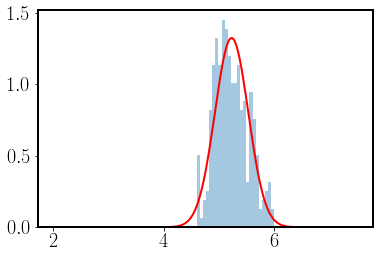

In [43]:

plt.hist(short_t["t"], bins= 25, normed=1, alpha = 0.4)

x = np.linspace(2.0, 7.5, 200)
mu1, std1 = norm.fit(short_t["t"])
plt.plot(x, mlab.normpdf(x, mu1, std1), color="red", lw=2)
print mu1, std1

In [44]:
import os
files = os.listdir(".")
#[ EXP for x in seq if COND ]

#Conditions for short 1000 integrations
#files = [x for x in files if x[-8:-4]=="2000"]

#conditions for longer 1e5 integrations
#files = [x for x in files if x[-7:-4]=="1e5"]

#conditions for longer 1e7 integrations
#files = [x for x in files if x[-7:-4]=="1e7"]

#conditions for even longer 1e9 integrations
files = [x for x in files if x[-7:-4]=="1e7" or x[-7:-4]=="1e6"]

print files



#files = [x if x[0:2]=="Sys" for x in files]
##try plotting all the distributions
#a = pd.read_csv("Sys_7_r2000.csv")
#b = pd.read_csv("Sys_45_r2000.csv")
#c = 

['Sys_24631_r200_1e7.csv', 'Sys_24808_r200_1e7.csv', 'Sys_10518_r100_1e7.csv', 'Sys_18539_r200_1e7.csv', 'Sys_19898_r200_1e7.csv', 'Sys_16588_r200_1e7.csv', 'Sys_22862_r200_1e7.csv', 'Sys_15220_r200_1e7.csv', 'Sys_4753_r100_1e7.csv', 'Sys_24306_r200_1e7.csv', 'Sys_22_r200_1e7.csv', 'Sys_24887_r300_1e6.csv', 'Sys_21872_r200_1e7.csv', 'Sys_15003_r200_1e7.csv', 'Sys_24995_r300_1e6.csv', 'Sys_5958_r100_1e7.csv', 'Sys_24824_r200_1e7.csv', 'Sys_24017_r200_1e7.csv', 'Sys_22520_r200_1e7.csv', 'Sys_24085_r200_1e7.csv', 'Sys_20620_r200_1e7.csv', 'Sys_24820_r200_1e7.csv', 'Sys_24670_r300_1e6.csv', 'Sys_24771_r300_1e6.csv', 'Sys_12840_r200_1e7.csv', 'Sys_24248_r200_1e7.csv', 'Sys_22998_r200_1e7.csv', 'Sys_2847_r200_1e7.csv', 'Sys_24763_r200_1e7.csv', 'Sys_22_r100_1e7.csv', 'Sys_23975_r200_1e7.csv', 'Sys_24987_r300_1e6.csv', 'Sys_24705_r300_1e6.csv', 'Sys_20041_r200_1e7.csv', 'Sys_23967_r200_1e7.csv', 'Sys_24670_r200_1e7.csv', 'Sys_23993_r200_1e7.csv', 'Sys_2847_r100_1e7.csv', 'Sys_19591_r200_1e7.c

In [45]:
'''fig = plt.figure(figsize= (15,10))
ax = fig.add_subplot("111")
count = 0
sigma = 0
for name in files[:]:
    a = pd.read_csv(str(name))
    a  = a[ (a["t"]<1e7)]
    time = np.log10(a["t"].as_matrix())
    #print str(name[3:-8])
    #print line[0][1]
    #print line_plot[2][1]
    x = np.linspace(3.0, 8.1, 500)
    mu1, std1 = norm.fit(time)
    plt_col = plt.plot(x, mlab.normpdf(x, mu1, std1),  lw=4, 
      label = "ID: "+str(name[4:-13]) + " STD:" + str("{0:.4}".format(std1))+ " Samples: " + str(a.shape[0]) )
    #col = plt_col[-1].get_color()
    #print "{0:.4}".format(std1)
    print a.shape, mu1, std1, "ID", name[4:-13]
    #if std1 >0.1:
    sigma +=std1
    count += 1
    #plt.hist(time, bins= 30, normed=1, alpha = 0.5, label = str(name[4:-10]) + " STD:" + str("{0:.4}".format(std1)), color=col)
    #break
    
plt.legend()
plt.title("Distribution of Unstable Shadow Systems with Orbits  < 1e7")
plt.xlabel("log 10 Time")
plt.show()
print "Avg sig", (sigma/float(count))
'''

'fig = plt.figure(figsize= (15,10))\nax = fig.add_subplot("111")\ncount = 0\nsigma = 0\nfor name in files[:]:\n    a = pd.read_csv(str(name))\n    a  = a[ (a["t"]<1e7)]\n    time = np.log10(a["t"].as_matrix())\n    #print str(name[3:-8])\n    #print line[0][1]\n    #print line_plot[2][1]\n    x = np.linspace(3.0, 8.1, 500)\n    mu1, std1 = norm.fit(time)\n    plt_col = plt.plot(x, mlab.normpdf(x, mu1, std1),  lw=4, \n      label = "ID: "+str(name[4:-13]) + " STD:" + str("{0:.4}".format(std1))+ " Samples: " + str(a.shape[0]) )\n    #col = plt_col[-1].get_color()\n    #print "{0:.4}".format(std1)\n    print a.shape, mu1, std1, "ID", name[4:-13]\n    #if std1 >0.1:\n    sigma +=std1\n    count += 1\n    #plt.hist(time, bins= 30, normed=1, alpha = 0.5, label = str(name[4:-10]) + " STD:" + str("{0:.4}".format(std1)), color=col)\n    #break\n    \nplt.legend()\nplt.title("Distribution of Unstable Shadow Systems with Orbits  < 1e7")\nplt.xlabel("log 10 Time")\nplt.show()\nprint "Avg sig", (si

In [65]:
import os
files = os.listdir(".")
#[ EXP for x in seq if COND ]


#conditions for longer 1e5 integrations
files2 = [x for x in files if (x[-7:-4]=="1e5") and (x[0:3]=="Sys")]

#conditions for longer 1e7 integrations
files3 = [x for x in files if (x[-7:-4]=="1e7") and (x[0:3]=="Sys")]

files4 = [x for x in files if (x[-7:-4]=="1e6") and (x[0:3]=="Sys")]


files = files2 +files3 + files4

print len(files)
files.remove("Sys_8744_r500_1e5.csv")
files.remove("Sys_1174_r500_1e5.csv")
files.remove("Sys_15003_r200_1e7.csv")
files.remove("Sys_18539_r200_1e7.csv")
files.remove("Sys_18651_r200_1e7.csv")
files.remove("Sys_22520_r200_1e7.csv")
files.remove("Sys_23005_r200_1e7.csv")
files.remove("Sys_24346_r200_1e7.csv")
#files.remove("Sys_24887_r300_1e6.csv")
#files.remove("Sys_24771_r300_1e6.csv")
#files.remove("Sys")
print len(files)
#files = [x if x[0:2]=="Sys" for x in files]
##try plotting all the distributions
#a = pd.read_csv("Sys_7_r2000.csv")
#b = pd.read_csv("Sys_45_r2000.csv")
#c = 

56
49


Sys_24008_r500_1e5.csv
Sys_5505_r500_1e5.csv
Sys_24453_r500_1e5.csv
Sys_24576_r200_1e7.csv
Sys_24887_r300_1e6.csv
49


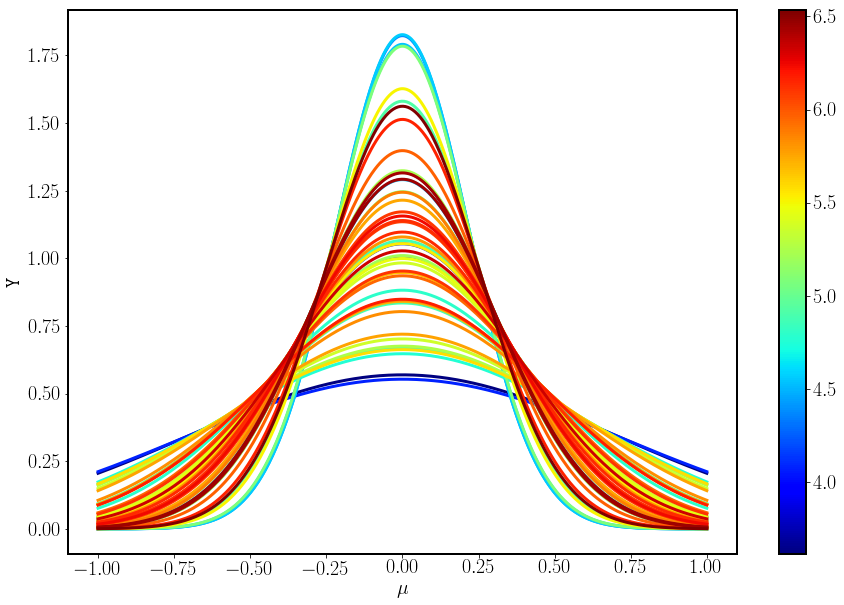

In [66]:
from matplotlib import rc

rc('text',usetex=True)
rc('font',family='monospace')
rc('font',serif='Times New Roman')
rc('font',size=20,weight='black',stretch='normal',style='oblique')
rc('axes',linewidth=2)

stds = []
onlystds = []

for name in files[:]:
    a = pd.read_csv(str(name))
    
    #if a.shape[0] >175:
    
    if "1e5"  in name:
        a  = a[ (a["t"]<1e5)]
    elif "1e6" in name:
        a  = a[ (a["t"]<1e6)]
    else:
        a  = a[ (a["t"]<1e7)]
    
    time = np.log10(a["t"].as_matrix())


    
    
    mu1, std1 = norm.fit(time)
    if std1 < 0.25:
        print name
    stds.append((mu1, std1, name))
    onlystds.append(mu1)

    #print name, mu1, std1
    
stds.sort()

norm1 = matplotlib.colors.Normalize(vmin = np.min(onlystds), vmax = np.max(onlystds))
c_m = matplotlib.cm.jet


fig = plt.figure(figsize= (15,10))
ax = fig.add_subplot("111")

#create a scalaer mappable
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm1)
s_m.set_array([])

for vals in stds:
    
    time = np.log10(a["t"].as_matrix())
    x = np.linspace(-1, 1, 500)
    plt_col = plt.plot(x, mlab.normpdf(x, 0, vals[1]),  lw=3, color = s_m.to_rgba((vals[0])), 
                       label = "SIG: " +str("{0:.3f}".format( vals[1] )) + " ID: " +str(vals[2][4:-13]) )
          #label = "ID: "+str(name[4:-13]) + " STD:" + str("{0:.4}".format(std1))+ " Samples: " + str(a.shape[0]) )
    

#plt.legend()
plt.colorbar(s_m)
#plt.title("Normalized Gaussians Colorcoded By Mu [Log10 Orbits]")
plt.ylabel("Y")
plt.xlabel(r"\mu")
print len(stds)

In [63]:
#print onlystds

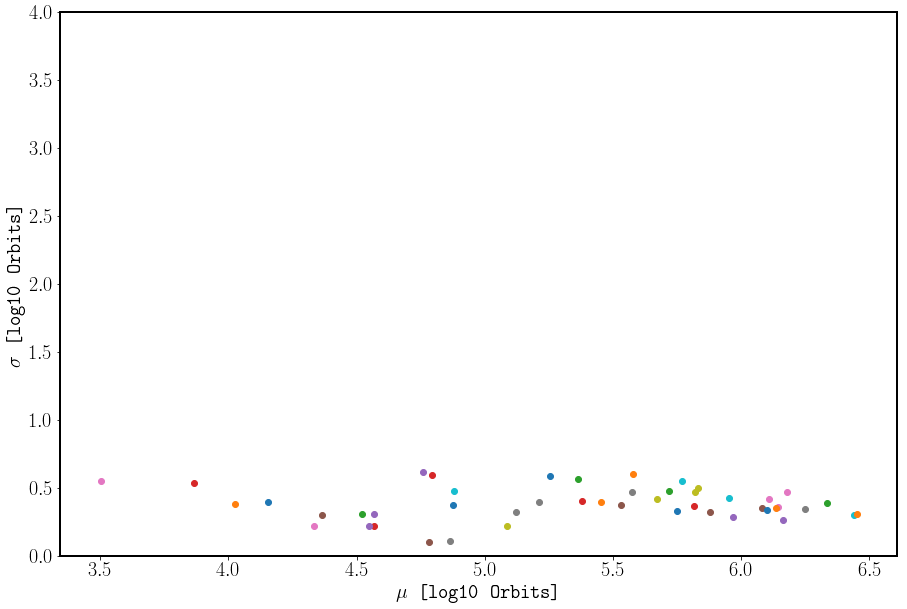

In [64]:
fig = plt.figure(figsize= (15,10))
ax = fig.add_subplot("111")

for name in files[:]:
    #print name
    a = pd.read_csv(str(name))
    
    if "1e7" not in name:
        a  = a[ (a["t"]<1e5)]
    else:
    
        a  = a[ (a["t"]<1e7)]
        
    time = np.log10(a["t"].as_matrix())


    mu1, std1 = norm.fit(time)
    plt_col = plt.scatter(mu1, std1, 
      label = "ID: "+str(name[4:-13]) + " STD:" + str("{0:.4}".format(std1))+ " Samples: " + str(a.shape[0]) )



    
#plt.legend()
#plt.title("Distribution of Unstable Shadow Systems with Orbits  > 1e5")
plt.xlabel("$\mu$ [log10 Orbits]")
plt.ylabel("$\sigma$ [log10 Orbits]")
plt.ylim([0,4])
plt.show()


6.61629208207 0.291602680161


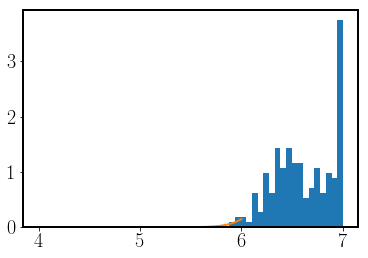

In [67]:
a = pd.read_csv("Sys_24346_r200_1e7.csv")# Sys_24771_r300_1e6.csv
plt.hist(np.log10(a["t"]), bins = 20, normed = 1)
x = np.linspace(4, 6, 500)
mu1, std1 = norm.fit(np.log10(a["t"]))
plt_col = plt.plot(x, mlab.normpdf(x, mu1, std1),  lw=2) 
print mu1, std1